<h1> <b> Lab - 2 </b> </h1>
<h2> <b> Excersise on Feature Selection and Correlation </b> </h1>
<br/>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
datasets = pd.read_csv("/content/drive/MyDrive/ML LAB/Exercise-CarData.csv")
datasets.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


<br/>

<h3> <b> Perfomring Feature Selection and Correlation </b> </h3>

*   Update datasets by removing price column as it is class label.
*   Generate correlation matrix.
*   Plot a heatmap.
*   Just for understanding purpose take a correction value of between column is greater than 0.4.
*   Drop columns which are not of type numeric.
*   Get the selected columns and update datasets and print

<br/>

In [12]:
# remove the price as it is a class label

datasets = datasets.iloc[:, 2:11]
# datasets = datasets.loc[:, datasets.columns != 'Price']
datasets

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...
1431,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,72.0,??,Petrol,86,0.0,0,1300,3,1015
1433,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,70.0,??,NaN,86,1.0,0,1300,3,1015


In [13]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1336 non-null   float64
 1   KM         1436 non-null   object 
 2   FuelType   1336 non-null   object 
 3   HP         1436 non-null   object 
 4   MetColor   1286 non-null   float64
 5   Automatic  1436 non-null   int64  
 6   CC         1436 non-null   int64  
 7   Doors      1436 non-null   object 
 8   Weight     1436 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 101.1+ KB


In [14]:
# generate correlation matrix

corr = datasets.corr()
corr.head()

,Age,MetColor,Automatic,CC,Weight
Age,1.000000,-0.099659,0.032573,-0.120706,-0.464299
MetColor,-0.099659,1.000000,-0.013973,0.029189,0.057142
Automatic,0.032573,-0.013973,1.000000,-0.069321,0.057249
CC,-0.120706,0.029189,-0.069321,1.000000,0.651450
Weight,-0.464299,0.057142,0.057249,0.651450,1.000000


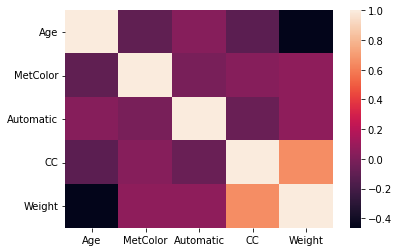

In [15]:
sns.heatmap(corr)

In [16]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.4:
            if columns[j]:
                columns[j] = False

In [17]:
datasets = datasets.drop(['KM', 'FuelType', 'HP', 'Doors'], axis = 1)
datasets

,Age,MetColor,Automatic,CC,Weight
0,23.0,1.0,0,2000,1165
1,23.0,1.0,0,2000,1165
2,24.0,NaN,0,2000,1165
3,26.0,0.0,0,2000,1165
4,30.0,0.0,0,2000,1170
...,...,...,...,...,...
1431,NaN,1.0,0,1300,1025
1432,72.0,0.0,0,1300,1015
1433,NaN,0.0,0,1300,1015
1434,70.0,1.0,0,1300,1015


In [18]:
selected_columns = datasets.columns[columns]
selected_columns.shape

(4,)

In [19]:
datasets = datasets[selected_columns]
print(datasets)

       Age  MetColor  Automatic    CC
0     23.0       1.0          0  2000
1     23.0       1.0          0  2000
2     24.0       NaN          0  2000
3     26.0       0.0          0  2000
4     30.0       0.0          0  2000
...    ...       ...        ...   ...
1431   NaN       1.0          0  1300
1432  72.0       0.0          0  1300
1433   NaN       0.0          0  1300
1434  70.0       1.0          0  1300
1435  76.0       0.0          0  1600

[1436 rows x 4 columns]
